In [1]:
using DelimitedFiles
using CairoMakie

include("../../Modules/TestingFunctions.jl")
using .TestingFunctions

In [2]:
lo_train = vec(readdlm(joinpath(@__DIR__, "..", "..", "Data", "lorenz_train_0_05.txt")))
lo_test = vec(readdlm(joinpath(@__DIR__, "..", "..", "Data", "lorenz_test_0_05.txt")))

10001-element Vector{Float64}:
  -0.7081105746641868
  -1.0655725978683848
  -1.632156366355012
  -2.547045618142249
  -4.02751892253803
  -6.378718286912411
  -9.869360162880017
 -14.133670318936842
 -17.00902718809827
 -15.472867332316168
   ⋮
  13.755412712722647
  10.388651793674478
   6.563100105282945
   3.6436064205554284
   1.850372101320824
   0.89044579875696
   0.42713652720890416
   0.22641853703532017
   0.15695046818267286

In [3]:
ro_train = vec(readdlm(joinpath(@__DIR__, "..", "..", "Data", "rossler_train_0_05.txt")))
ro_test = vec(readdlm(joinpath(@__DIR__, "..", "..", "Data", "rossler_test_0_05.txt")))

10001-element Vector{Float64}:
  3.188483967445763
  3.578413574671417
  3.963081881326153
  4.341440265007745
  4.712440512402364
  5.075036063908876
  5.428182772562551
  5.77083992366413
  6.10197137201624
  6.420545307163868
  ⋮
  3.8719779590396235
  2.962884255609664
  2.143858888553149
  1.4281263929964334
  0.8164226520497573
  0.3006445971235791
 -0.13213881965347551
 -0.4964088864861764
 -0.8060311662663076

In [4]:
testing_params = create_testing_params(
    readout_switching = false
)

TestingParameters(false, false, false, false)

[10.20827904858546, 16.281501896716254, 4.236394228582984, -4.8677060748003225, 11.974642753281927, -19.50868617675609, -12.435230134788341, -12.246117811121625, 0.14891423735549764, 5.373850885277122, 0.3899258985736992, 1.1775976008023998, 1.7513317842248457, -0.3280905743113787, 11.162149400654261, 2.193901716846196, 0.5734637754666702, -10.680130456991186, -0.14972849041114278, -6.241256398204559, 6.1647431804110955, 12.165818190797637, -0.2515084089250842, 3.3460274897834585, 9.811318222144902, 0.3598239256362846, 7.775838054831915, 5.6872982881071295, -3.9537830363742557, 11.511169940639741, -8.454917798301777, 0.583714038866223, 7.32388697388296, -1.3461410993844332, -3.4329481927869803, 0.8619520280201085, -1.1925539516284662, 0.27995446974590527, -6.138416608743887, 1.7580430996284289, 12.879290485611657, -0.9197552658767193, 2.6757054345858, -15.691621727831949, -9.44819389280378, 9.960694146208677, -1.9022972200400028, -2.623003235927134, -5.89475424668959, -2.56389683929843

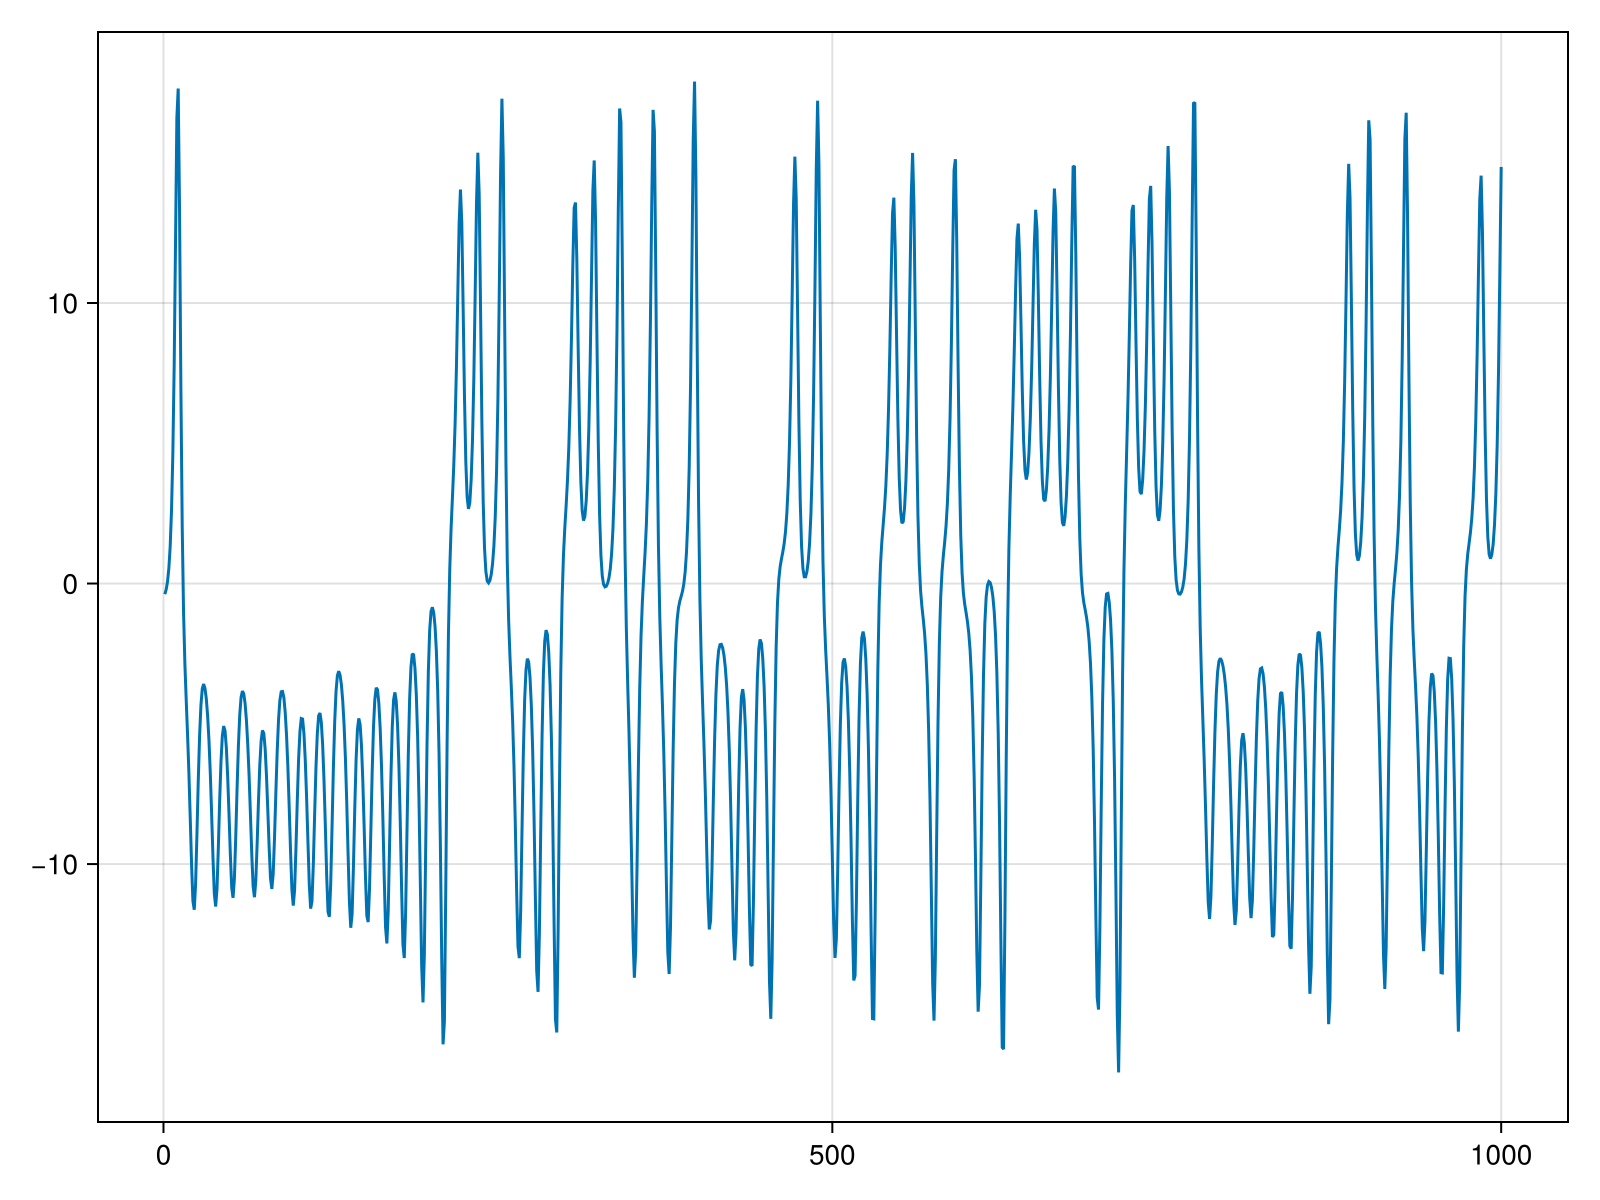

In [5]:
# preds = create_pred_for_params_free_run(lo_train, 100, 3; k = 400, testing_params=testing_params)
preds = create_pred_for_params_multi_step(lo_train, lo_test, 3, 1000; k = 100, testing_params=testing_params)
fig = quick_graph_series(preds[1:1000])

# CairoMakie.save("sub_reservoirs_freerun.pdf", fig)

fig

[2.7134801248605585, -2.223129950655282, -3.5371354128964114, 14.038684774078598, -2.252599605733156, 5.984010894551136, 2.7249166264337528, 0.7736638419577869, -1.4492515446109087, -2.155643154245154, -0.41536864441675586, -1.0928147702491793, -9.314556494151685, 1.08197456202535, -2.131149092091223, -10.464568234776769, -10.288581471369474, 6.0542694535916945, -12.082662858999324, 3.0451070450728466, 0.4563430816028829, 2.9906500544802284, 13.291256073874386, 13.852560314426377, -0.08336813430890089, 3.6321252287525687, -12.635142421539088, 8.398157835667227, -0.6761186733416819, -5.141676112404315, 2.853264598324148, 0.7305563598766976, -12.396730497991733, 5.974145676733808, 0.47476055773482423, -4.067935853596811, 5.065767588473854, 5.0899057857507275, 4.77950234550966, 12.793563850792761, 4.968093317006204, 2.6543202286916388, 4.121156202888791, 10.21006091646549, 7.048786338860812, -0.5718572735926947, 4.178634961321743, 3.014948847268499, 1.7227582938752406, 5.709335144275037, 

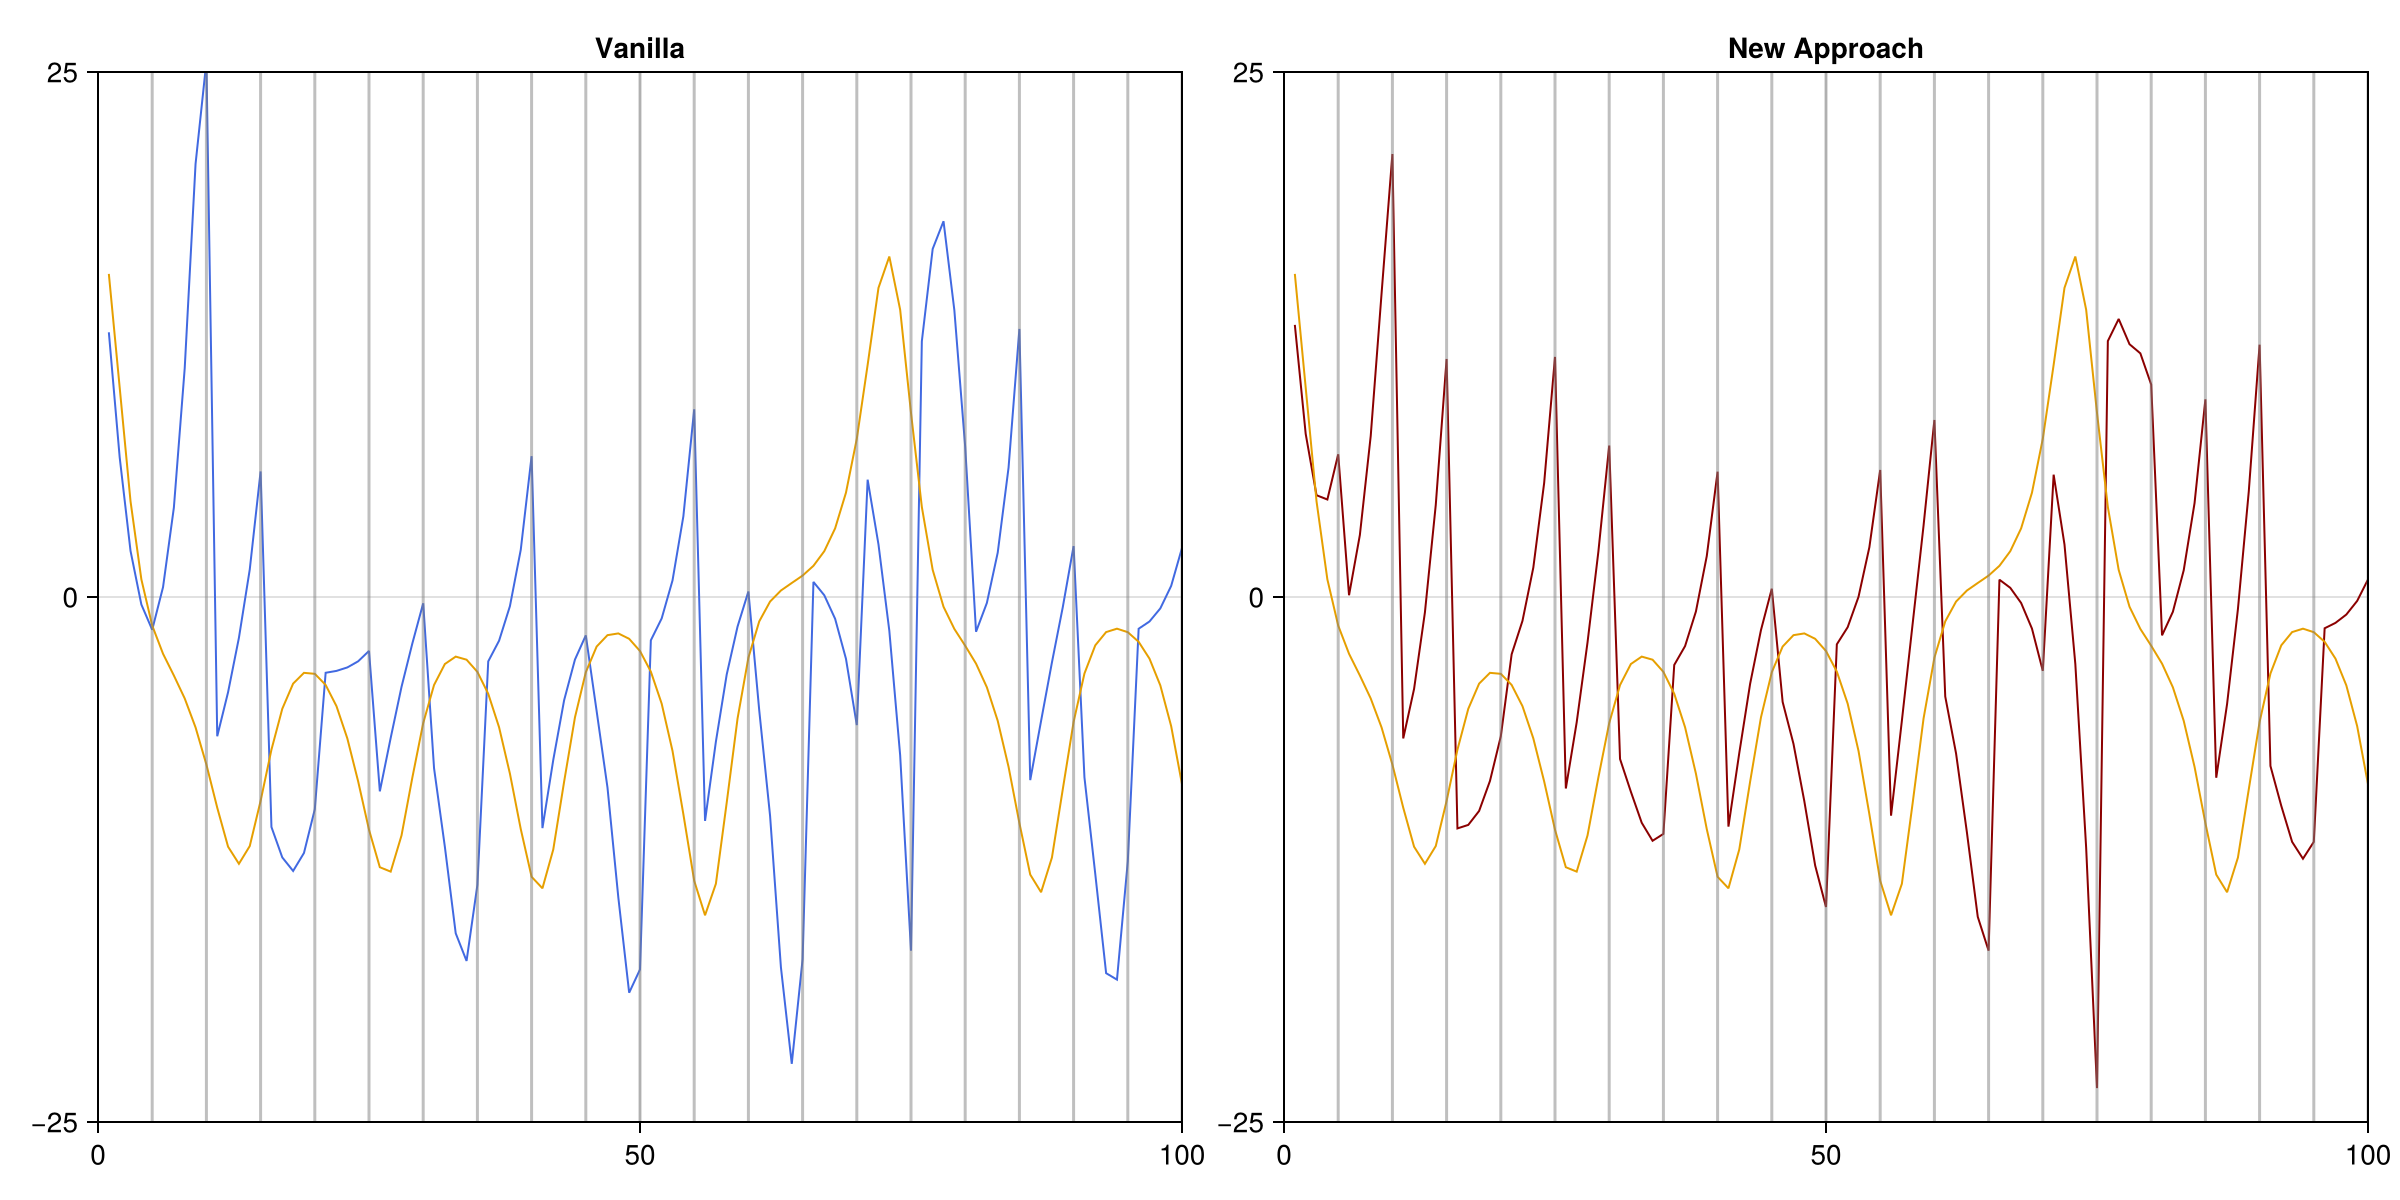

In [6]:
fig = test_multi_step(lo_train, lo_test, 3, 100; n_steps=5, from=0, to=100, testing_params=testing_params)

# CairoMakie.save("sub_reservoirs_multistep.pdf", fig)

fig

[-0.6041894288532703, -0.6998432651818567, -1.920180451539751, 2.1133468871389467, 0.7051928333144307, 0.14593956269362104, 2.052107434754981, -4.334643091095852, 1.062173168981052, -7.123594881325036, 0.26159781857251685, -1.0371966767111451, 3.471245192035755, -0.22566846903608037, 6.2914177388988355, 0.6847418613247018, 3.263631880065953, 0.7920416518526722, 7.531032816127977, 3.982080860651294, 10.131331303717628, 2.202900458462476, 1.0549450066415247, -7.386570364030055, 4.348827251618144, 3.443819509537356, 2.395351113107234, 5.362609249776541, 0.03695579530618735, -4.048599636427888, 1.687914677305783, -1.6836363202316875, -0.10576028798486731, 4.750495248987408, 5.718222405271113, 1.3316435838991605, -1.0878255062639646, -4.298130630792018, 0.06305398522263962, -9.959662837982721, 1.8460557227598893, 0.4140832796473701, 0.42229011035127695, 0.07740306748171695, -2.8675743822684874, 2.9582925343626503, -0.573919711479285, 12.014725414614993, 5.86883318563836, -2.8062126763897144

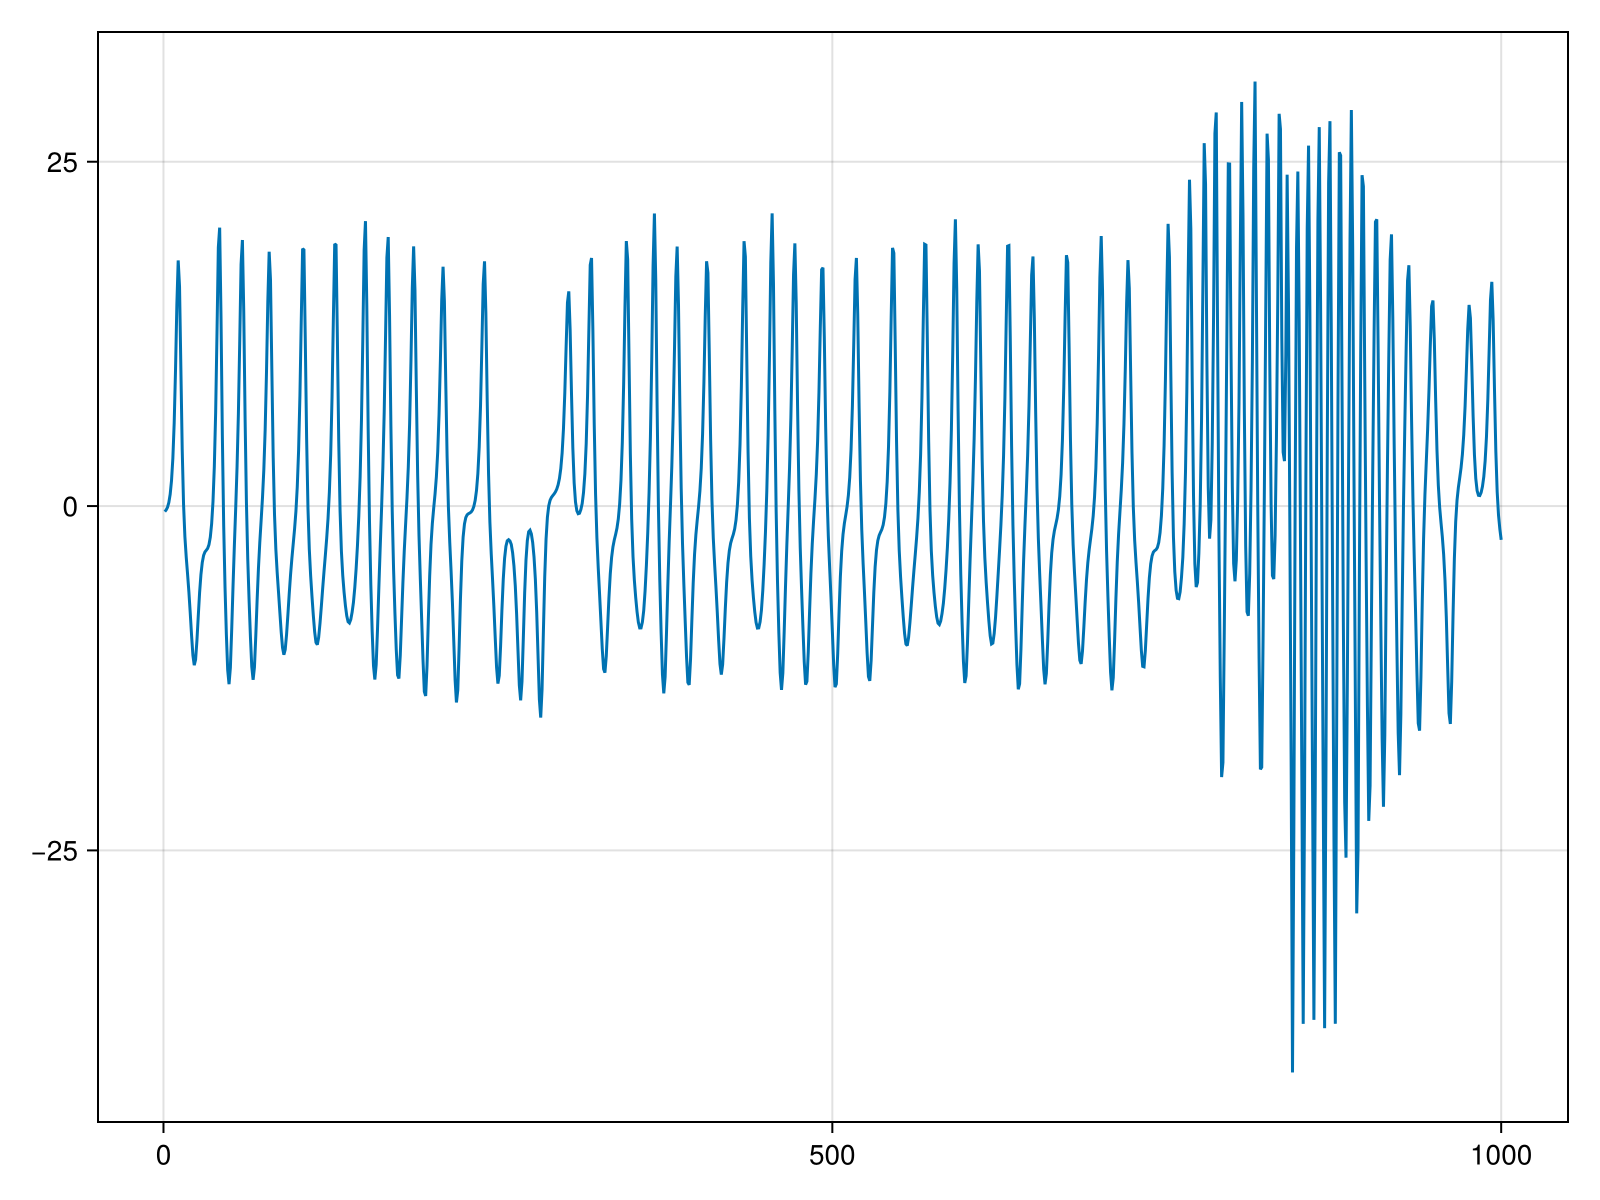

In [7]:
# preds = create_pred_for_params_free_run(lo_train, 100, 3; k = 400, testing_params=testing_params)
preds = create_pred_for_params_multi_step(lo_train, lo_test, 4, 1000; k = 100, testing_params=testing_params)
fig = quick_graph_series(preds[1:1000])

# CairoMakie.save("sub_reservoirs_freerun.pdf", fig)

fig

[0.18918231248643727, 8.06034449308835, 2.266689663250638, -6.687539474356899, -3.4040418757304023, -11.264941941756591, 7.845739503836248, 1.3537922234972855, -15.375714924050346, -0.5171185054698367, -8.382056631301023, 7.710292536564261, 30.367318873179578, 6.901064909681468, -6.606839411049541, 0.5190507914268233, 4.794815212211162, 8.345214722090269, -1.155545639716104, -18.459796554978933, 2.3337400566004933, -2.3073630563521346, -1.5101245072522473, 1.8742654326579273, -1.6375934483084427, -6.664640259597598, -3.3272808939009795, -0.09180085262774496, -4.177555457367241, -6.772600937656634, 2.877208020782893, 7.83288929917207, -1.8364133603814712, 2.0162140399968105, -0.785940498601425, 13.757454666213132, -2.522461972533545, 0.30556150489733597, -2.3104564649892954, 3.1781489781005225, -0.012353132692958027, 10.244058959710573, 8.888463620042263, 0.4905249414636, 0.17484260640986315, 12.087837156277837, 2.9263392644336537, -1.4356233925524995, -1.423551702156671, 8.826666180320

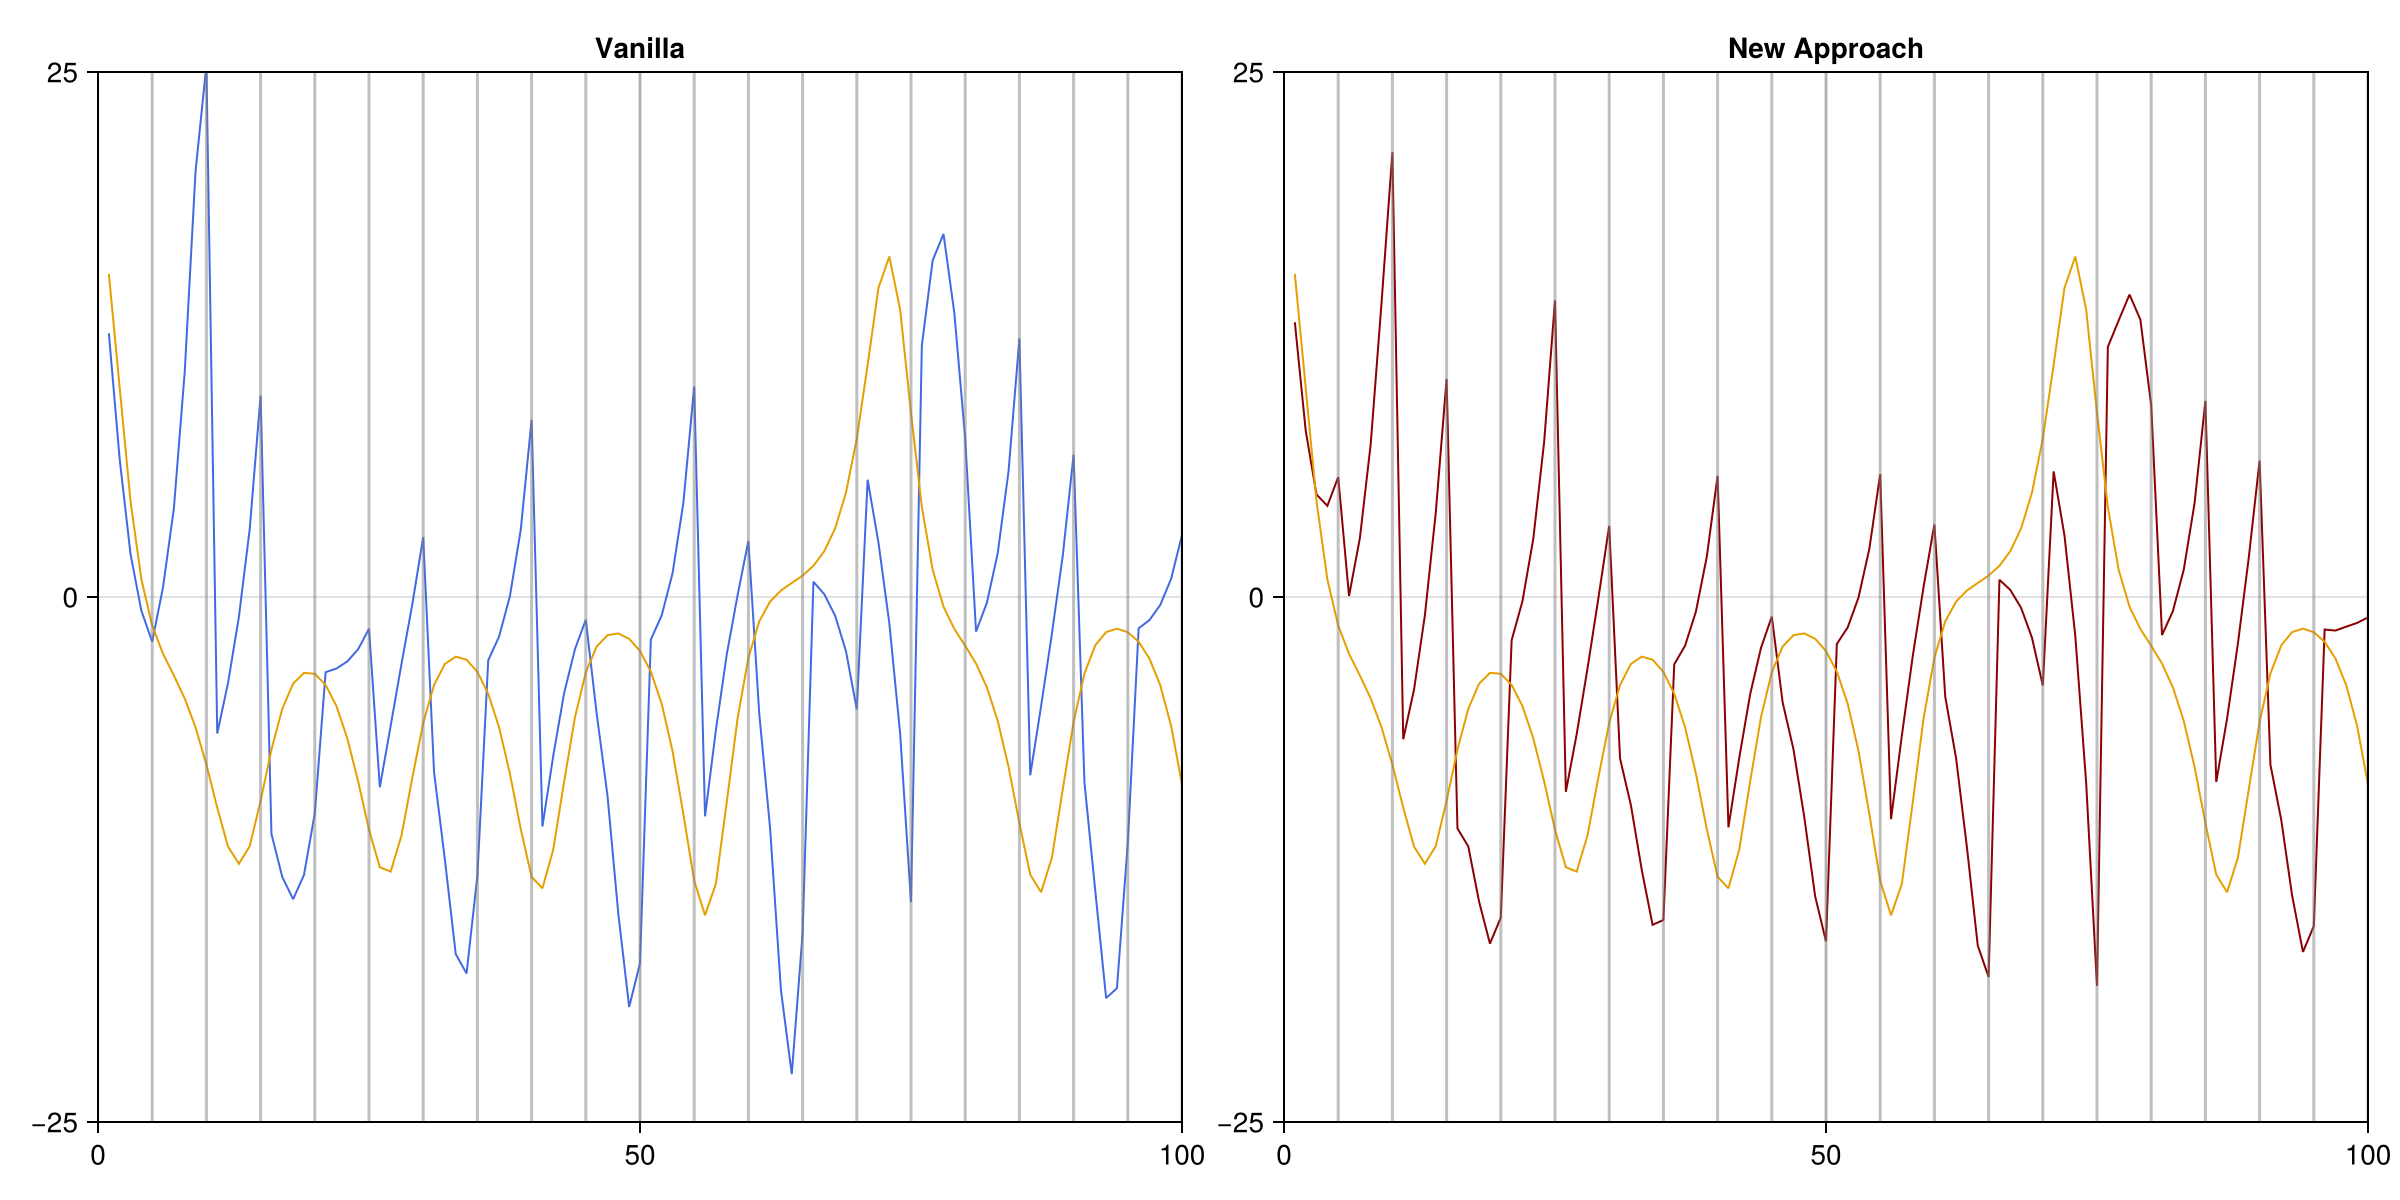

In [8]:
fig = test_multi_step(lo_train, lo_test, 4, 100; n_steps=5, from=0, to=100, testing_params=testing_params)

# CairoMakie.save("sub_reservoirs_multistep.pdf", fig)

fig

[0.11624174574477586, 0.6201981005139448, 0.04474373706487823, -1.291726860004685, -0.23389821764023846, -0.8758491623770482, -0.4783647513238714, -0.7592579686147374, -0.6144695175014422, -0.3508606405668042, 1.3070174167546733, -0.6320408504681934, 0.9323185886998357, -1.1497321726102048, -0.5645653366807257, 0.7093619991785836, -0.2168453592769197, -0.388284757917144, 1.2766386956769664, -0.2745777926998711, 0.18789416192429792, 0.2146641900526891, -0.007781247949560287, 0.08973960509998971, 0.08256319841615677, 0.7258836235545468, -0.16314738128263492, 0.04521796996209103, 0.5830828333736167, 1.0335566721828806, -1.2220897740911816, -1.2267370098290713, -0.9644377538407827, 0.16198979933843255, -0.2757049396906819, 0.10365367495632676, -0.37134850314732626, -0.049677967443877355, 0.24512797896064395, -0.8548478759239243, 0.469215708533103, 0.997398249267898, 1.4283770309160428, 0.23458296776536386, 0.028303784178455173, 0.5967133597189556, -1.2277219617452761, 1.3634885743542635, 0

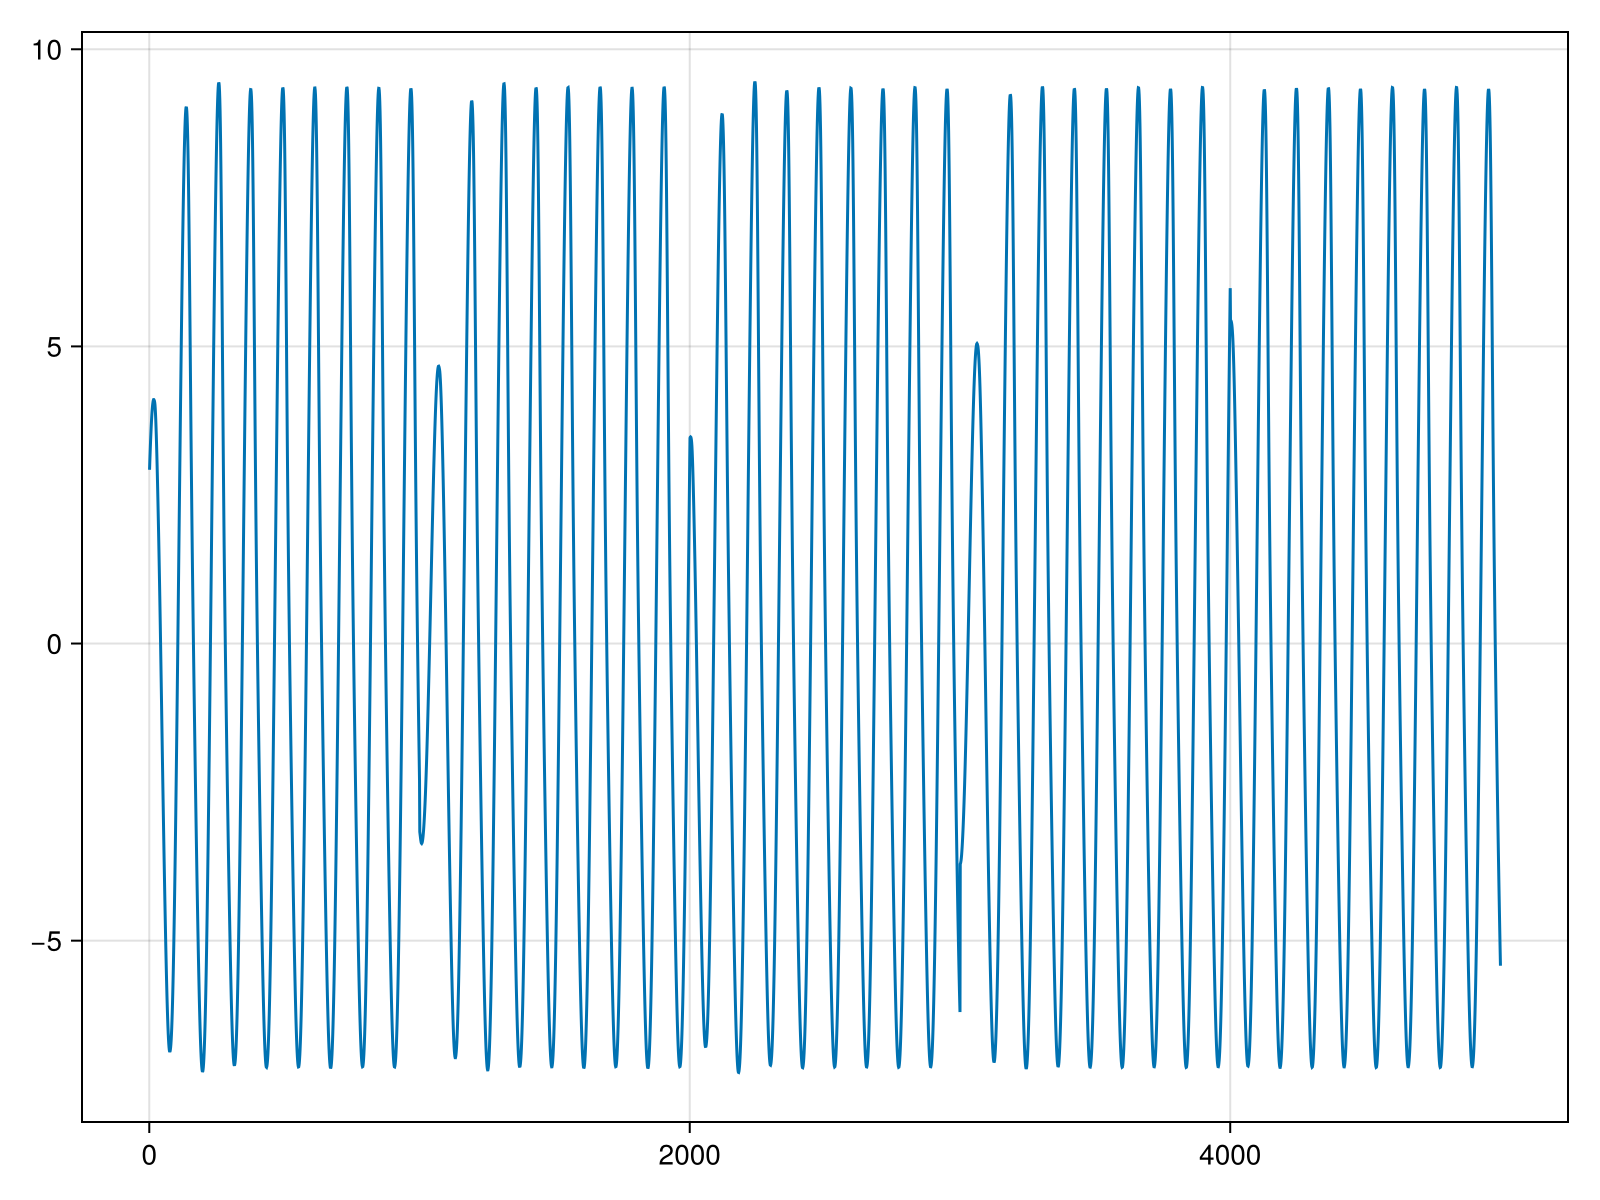

In [9]:
# preds = create_pred_for_params_free_run(lo_train, 100, 3; k = 400, testing_params=testing_params)
preds = create_pred_for_params_multi_step(ro_train, ro_test, 3, 1000; k = 100, testing_params=testing_params)
fig = quick_graph_series(preds[1:5000])

# CairoMakie.save("sub_reservoirs_freerun.pdf", fig)

fig

[0.8290195417646467, -0.5358322953191816, -0.9824401427526814, 0.20436175659144176, 0.9773002655027744, 0.6121191441209067, -0.27928436989904887, -3.99130535675611, 0.44336912955678104, 0.030525718644639526, 0.013557299235797371, 0.0831551709198118, 1.1973796505682288, 0.17115263884014964, -0.4101266138145249, 1.6215718244831483, -0.1793227001049508, 0.4341673170964788, 1.3252683970630048, 0.8924057822216325, -0.46939201914176437, 0.24618053769809842, -0.08162077826688735, 1.6700958980557565, 3.888117114338823, 0.5008220621413272, -0.6861170920922741, -0.5624938434094963, -0.0006526011793613723, 1.0123029192215076, -0.08400375187262321, -0.557722796100399, 1.9242823467121977, 0.3966214776238686, 0.5822657456563702, -1.1378783478236192, 1.0595606799574904, -0.45381419305403475, -0.26591532388196837, 1.3052190116923459, 0.5545125389921901, -0.3824095957697178, -0.9157119145267469, 0.579140308233845, -0.026817722599191605, 1.3615111955251518, 2.2747479193397915, 1.0489897712415943, 0.0125

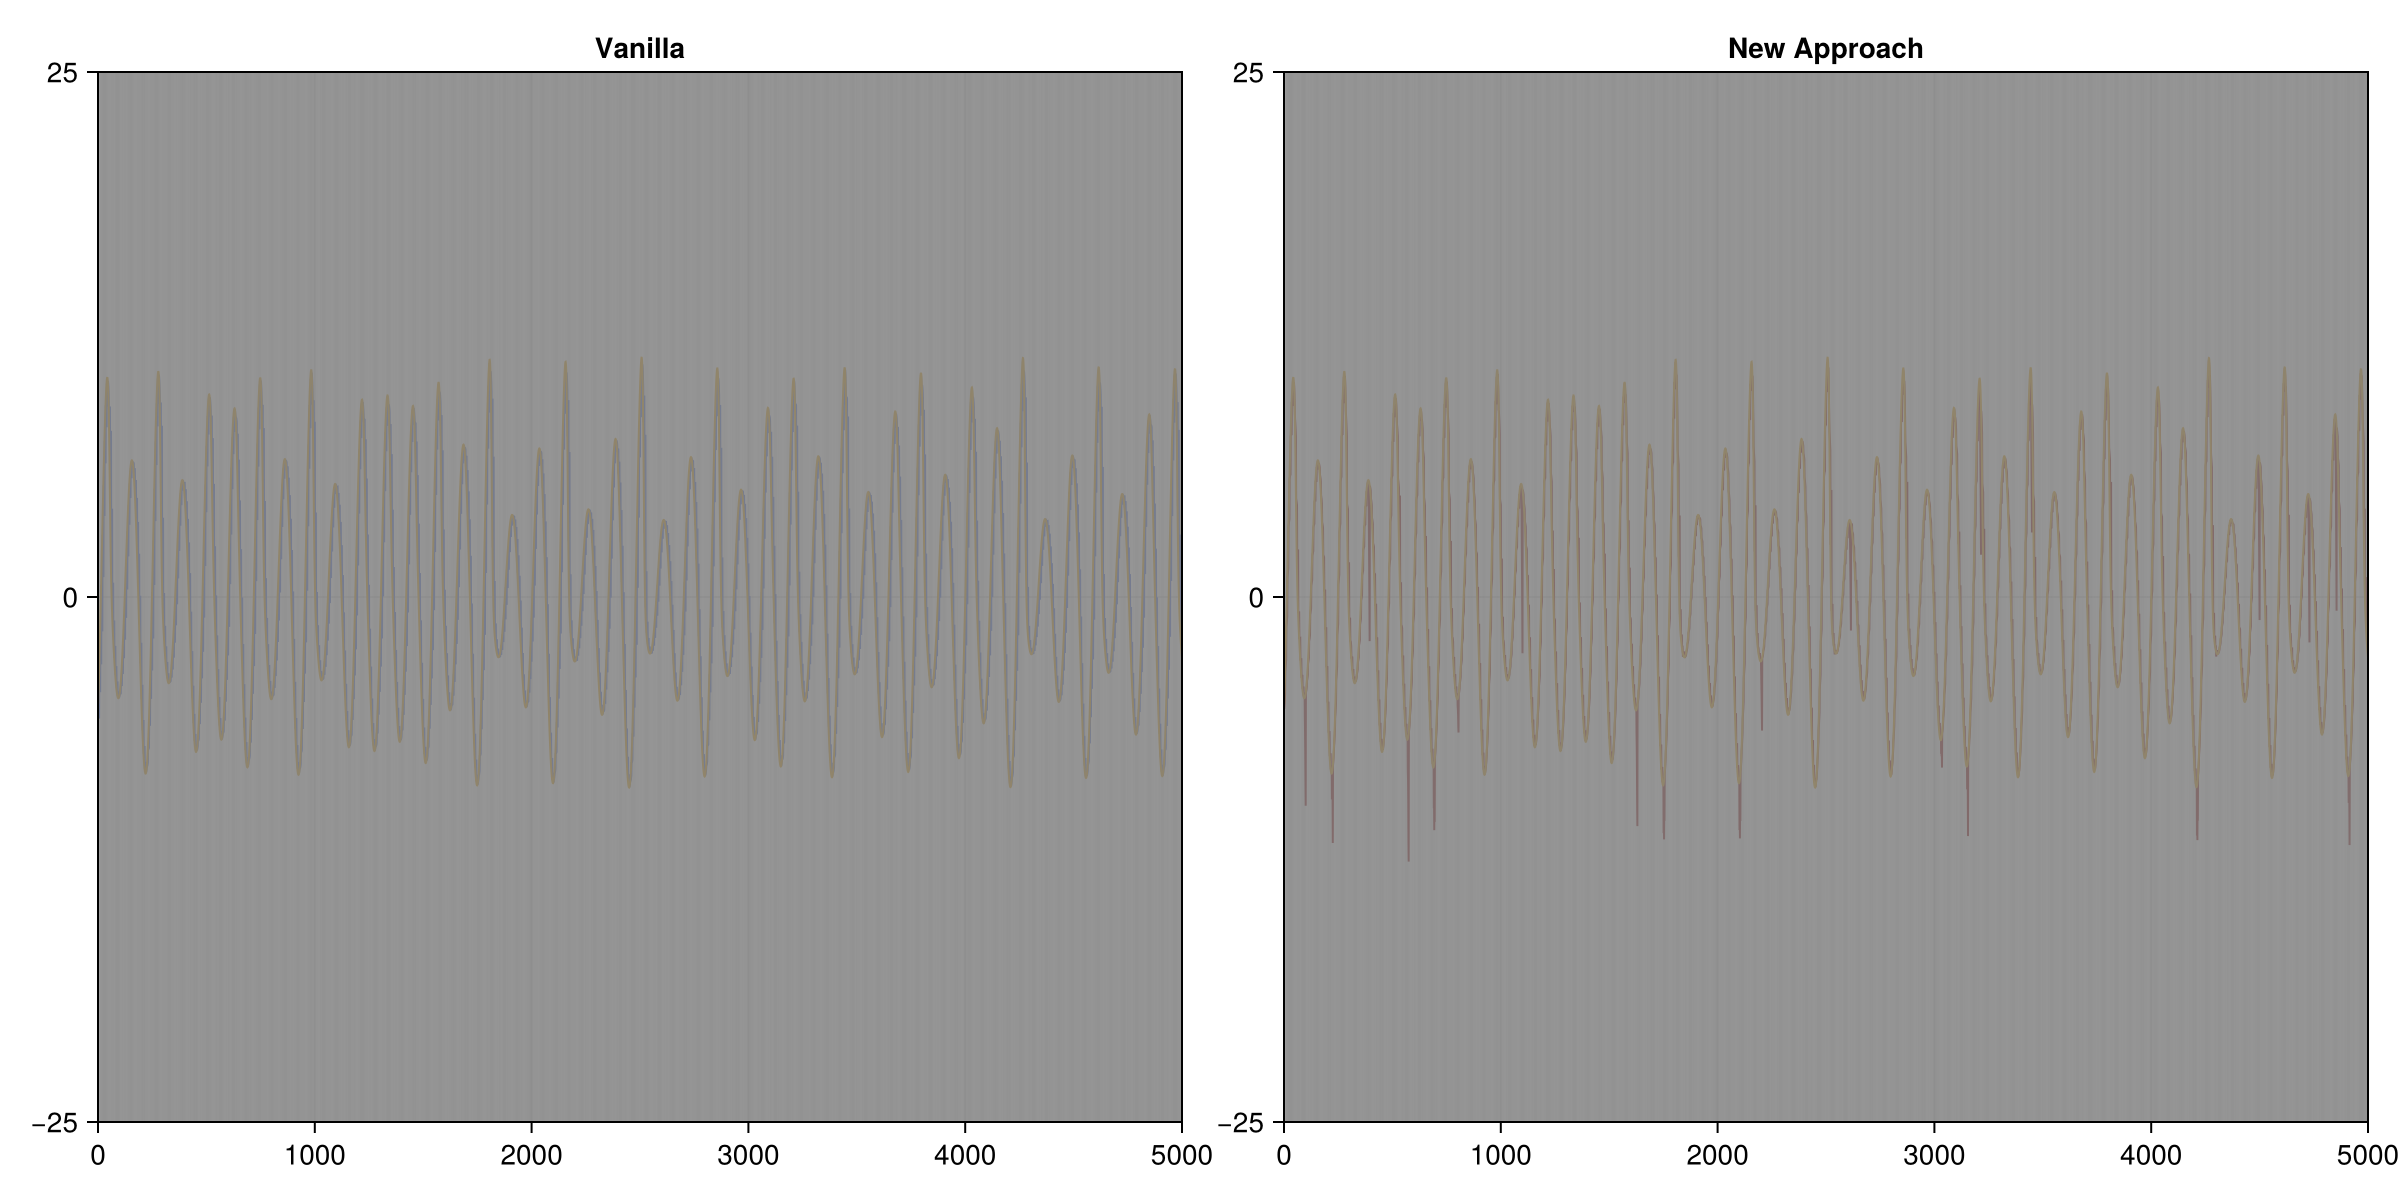

In [10]:
fig = test_multi_step(ro_train, ro_test, 3, 100; n_steps=5, from=0, to=5000, testing_params=testing_params)

# CairoMakie.save("sub_reservoirs_multistep.pdf", fig)

fig

[-0.830179184679997, 0.045318254966031264, -0.4817061979731719, -0.2332296734305607, -0.30625849373712233, -0.6224196417028325, 0.044203118383143794, -0.24790819075655474, 1.71819800935277, -0.8508371708635795, -0.7588324962987624, 1.2063521823603935, -0.9176115916124831, -1.1905592110003402, 0.1297317335861709, -0.1853107776577059, -0.0442128445079358, 0.8420507710786411, 0.14322856561525474, 0.8987283525973044, 0.21393391071225049, -0.1870201402022617, 0.777332124865218, 1.109887890783046, 1.1173832714990328, -1.4929138147364625, -0.3056457015035292, 0.6578080213408036, 1.0956183941161497, -0.7253983448069421, 0.4478242276775809, 0.353020816960161, -0.3533894927947167, 0.9101908547927944, 0.18712297119257335, 1.5699041523134463, -0.08276086307918479, -1.5386709340171896, -0.5022311089232987, -0.71251725275392, -0.8742804768772278, -0.695094043346397, 0.42667069423967163, 0.5532448471478716, 0.26299466622535095, -1.0406794027612198, 0.3742367207405252, -1.1178912228607318, -0.18611833

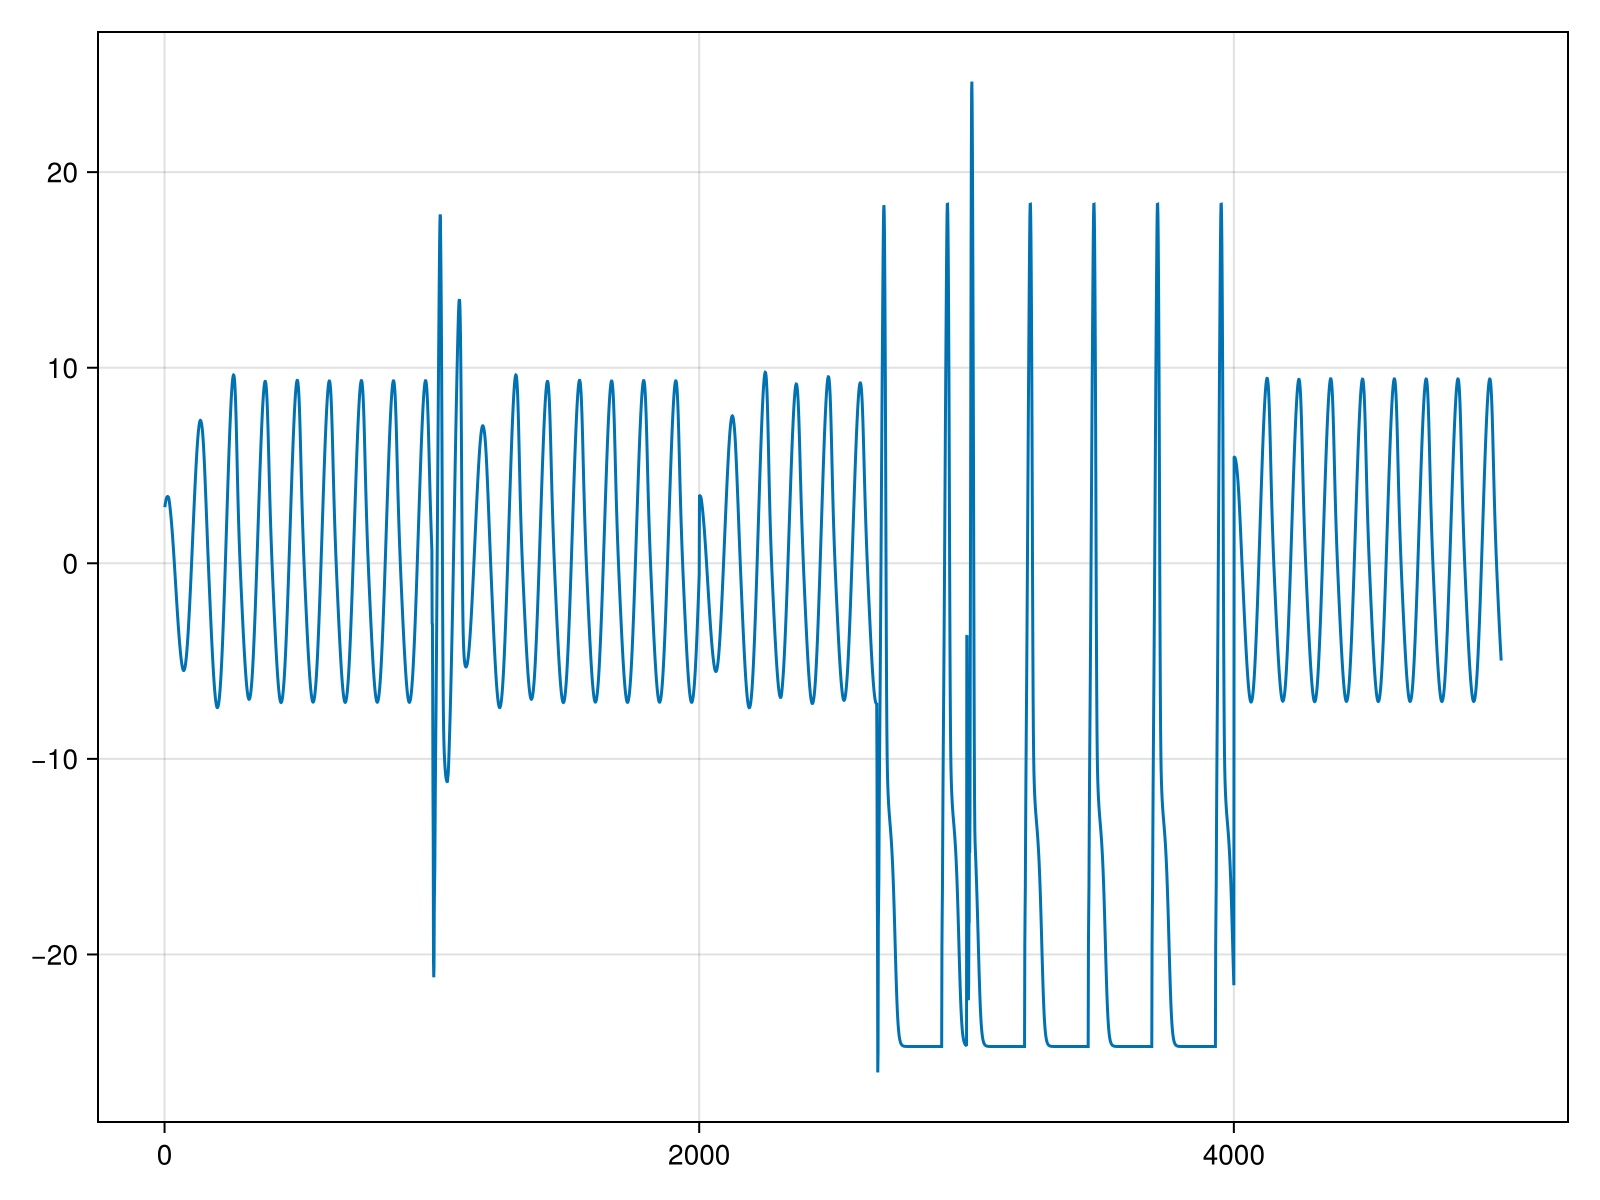

In [11]:
preds = create_pred_for_params_multi_step(ro_train, ro_test, 4, 1000; k = 100, testing_params=testing_params)
fig = quick_graph_series(preds[1:5000])

# CairoMakie.save("sub_reservoirs_freerun.pdf", fig)

fig

[-1.5066058714557524, 0.7069105069935805, -0.8259249165000642, -0.11398647456938811, -0.7719293744656734, 0.08703691583814174, 2.0753512674443053, 0.904957409093416, 0.11306270909258383, 0.001697236136216158, 0.05990618681739103, -0.35541669302270523, 0.15667991265510098, -1.900954611135547, 0.5164711656072868, -0.5555924918026371, -0.5016763898784125, -0.18045672697779608, -0.2558811546568091, -1.0790478719365408, -2.2079572214644454, 0.7535012075874937, 0.7512379394010146, -2.963152821814202, 1.232420335007331, -1.399355541975729, 1.1033230321039464, 0.34967468087783943, 1.7053863762014776, -1.3964564833651538, -0.6452411085195194, -1.3742166204081807, -0.040180743265360766, -1.4092634293288195, -1.0912358952994468, 1.38011974832921, 1.112327523612054, -0.8777845090053769, -0.1102334801879859, 0.4565378981576021, 0.7405248248744526, -0.20336624134880657, 0.44310950898102197, -0.6578539728297325, 0.5258457838873215, 0.9226644694247937, 0.02975206622163398, 0.9976024070466696, -2.73530

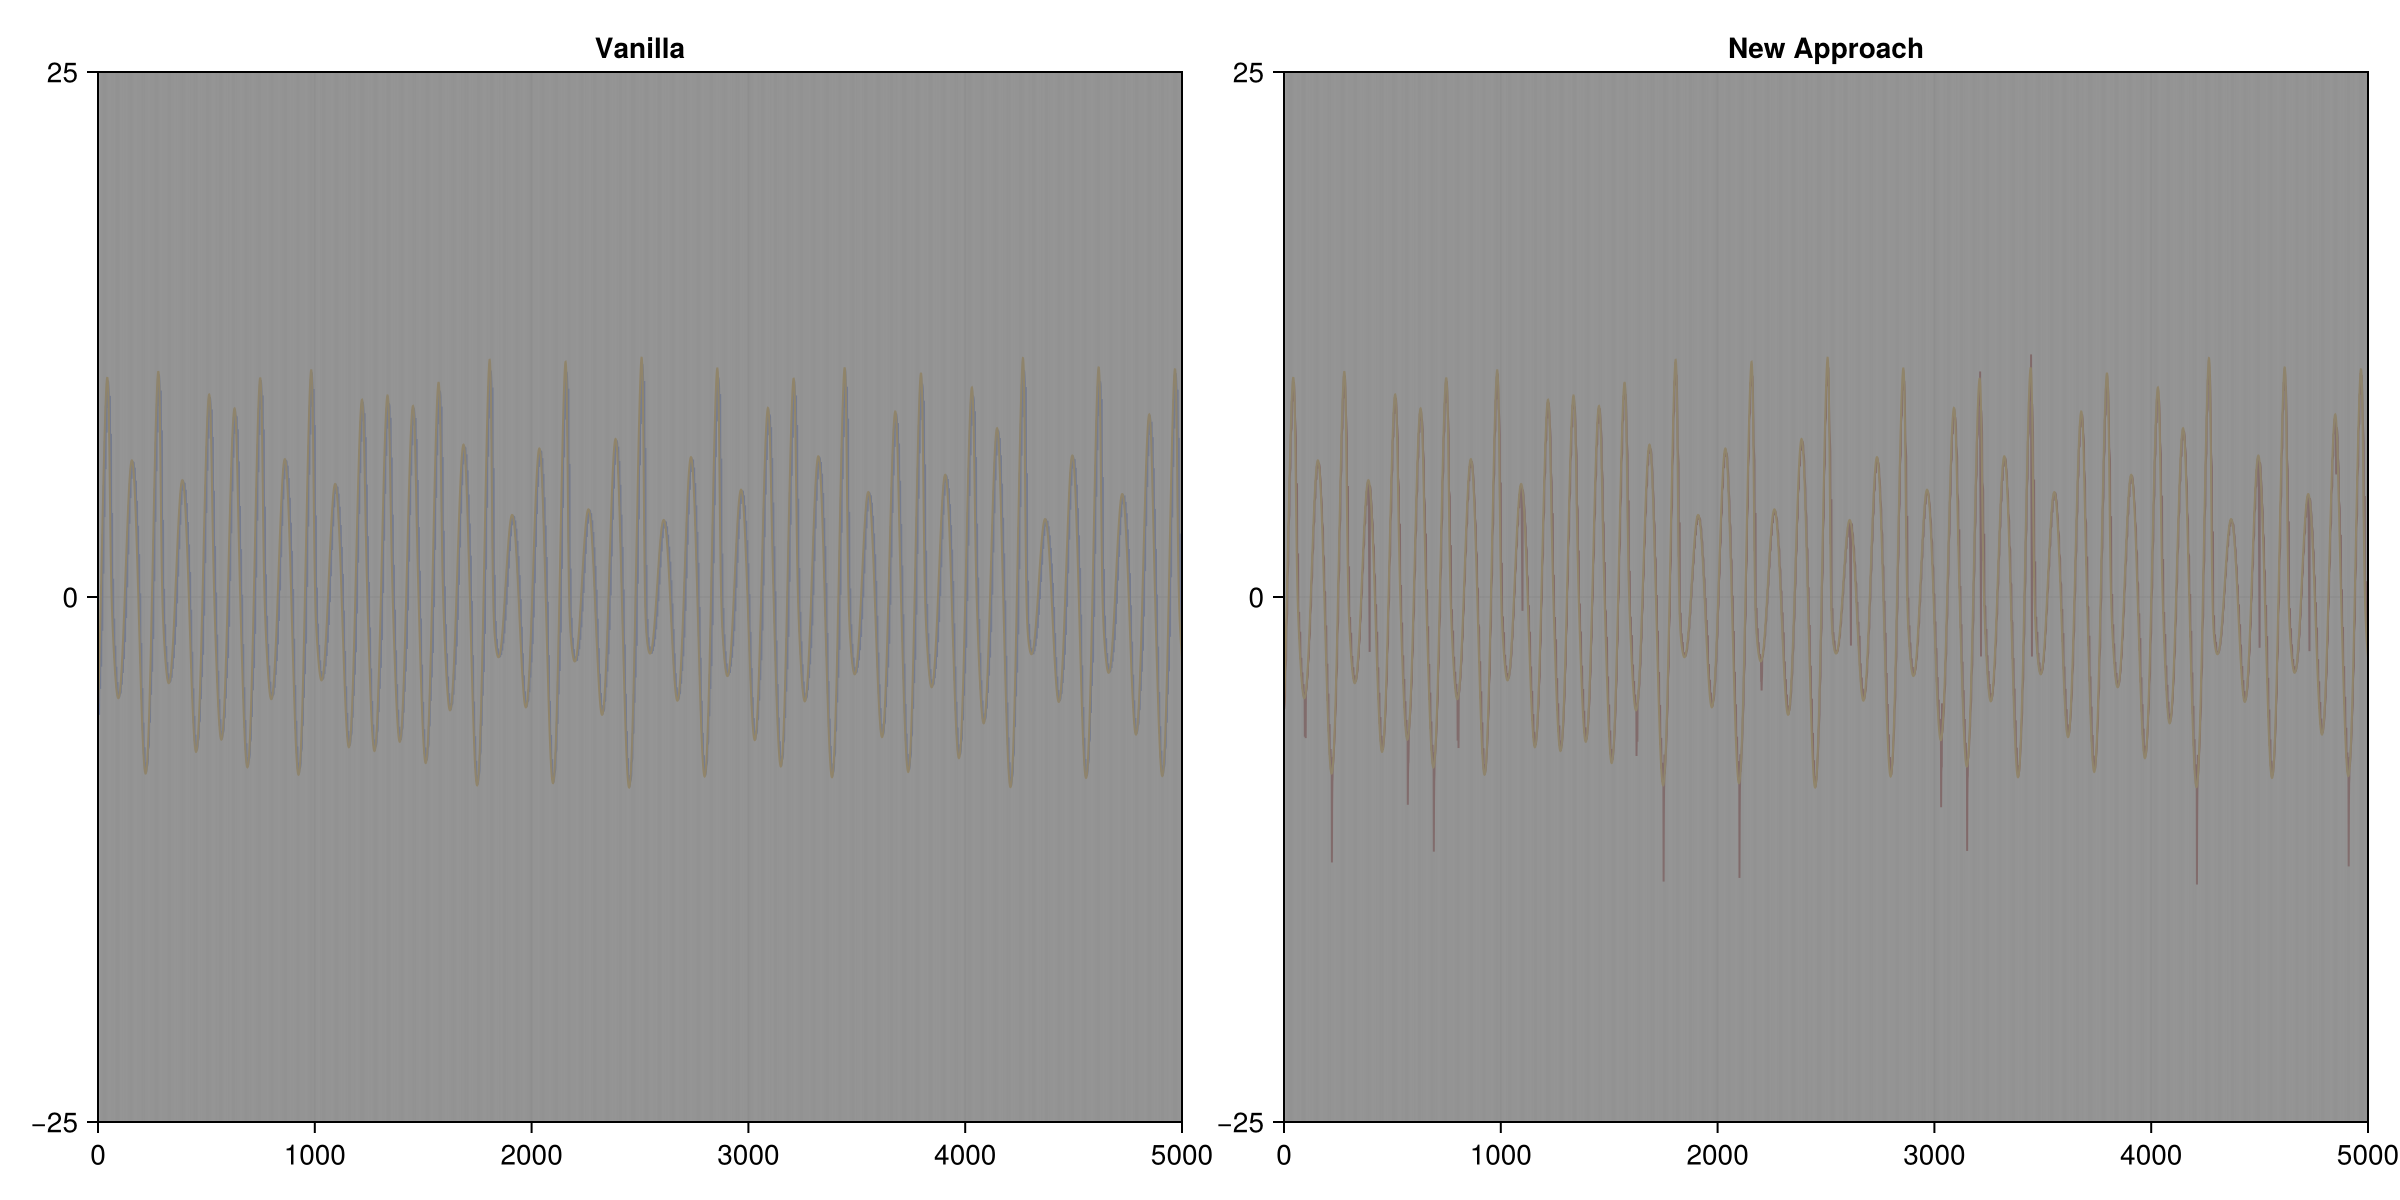

In [12]:
fig = test_multi_step(ro_train, ro_test, 4, 100; n_steps=5, from=0, to=5000, testing_params=testing_params)

# CairoMakie.save("sub_reservoirs_multistep.pdf", fig)

fig